# India COVID-19 Visualizations
## Ambarish Karmalkar

In [1]:
import datetime, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
print('PAGE LAST UPDATED:\n' + str( datetime.datetime.today().strftime ('%d %b %Y') ))

PAGE LAST UPDATED:
07 Sep 2021


## +++ Data Information

Data source: https://www.covid19india.org/<br>
Data files: https://api.covid19india.org/<br>

## +++ Code

## Data Files to Fetch

In [3]:
# Files
url_state_wise         = 'https://api.covid19india.org/csv/latest/state_wise.csv'        # Statewise data summaries
url_case_time_series   = 'https://api.covid19india.org/csv/latest/case_time_series.csv'  # India daily cases data 
url_state_wise_daily   = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'  # Statewise daily cases data
url_state_tested_daily = 'https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv' # Statewise daily testing data

## Read Data

### Population

In [4]:
# Source: https://statisticstimes.com/demographics/india/indian-states-population.php
# Original source: https://uidai.gov.in/images/state-wise-aadhaar-saturation.pdf
population_csv = 'data/India_states_population.csv'
df_state_pop = pd.read_csv(population_csv, thousands=',')
df_state_pop = df_state_pop[['State','2019']]
df_state_pop['2019'] = df_state_pop['2019'].astype(float)
df_state_pop.rename(columns={'2019': 'Population'}, inplace=True)

# Add row with total for India
df_state_pop.loc[len(df_state_pop.index)] = ['Total', df_state_pop['Population'].sum()] 
df_state_pop.head()

,State,Population
0,Uttar Pradesh,237882725.0
1,Bihar,124799926.0
2,Maharashtra,123144223.0
3,West Bengal,99609303.0
4,Madhya Pradesh,85358965.0


### Read statewise data summaries

In [5]:
# Read statewise data summaries
df_state_summary = pd.read_csv(url_state_wise)
df_state_summary.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,33095450,32256552,441443,384609,13/08/2021 23:27:22,12846,TT,38130,39090,368,NaN
1,Andaman and Nicobar Islands,7573,7437,129,7,13/08/2021 23:27:22,0,AN,1,0,0,NaN
2,Andhra Pradesh,2023242,1994855,13935,14452,13/08/2021 23:27:22,0,AP,1178,1266,10,NaN
3,Arunachal Pradesh,53474,52595,268,611,13/08/2021 23:27:22,0,AR,66,88,1,[July 25]: All numbers corresponding to Papum ...
4,Assam,593087,580911,5719,5110,13/08/2021 23:27:22,1347,AS,471,420,9,[Jan 1]: 1347 cases i.e Covid +'tive patients ...


In [6]:
# State codes
state2code = dict(zip(df_state_summary['State_code'], df_state_summary['State']))
state2code['TT'] = 'INDIA'
state2code['DN'] = 'DNH DD'
state2code['AN'] = 'Andaman Nicobar'

# Extract and sort data based on total cases per state since the pandemic began.
state2conf = dict(zip(df_state_summary['State_code'], df_state_summary['Confirmed']))
state2conf = {k: v for k, v in reversed(sorted(state2conf.items(), key=lambda item: item[1]))}

# Extract and sort data based on total cases per state since the pandemic began.
state2death = dict(zip(df_state_summary['State_code'], df_state_summary['Deaths']))
state2death = {k: v for k, v in reversed(sorted(state2death.items(), key=lambda item: item[1]))}

In [7]:
df_state_summary = pd.merge(df_state_summary, df_state_pop, on='State', how='outer')
df_state_summary.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population
0,Total,33095450,32256552,441443,384609,13/08/2021 23:27:22,12846,TT,38130,39090,368,NaN,1.371360e+09
1,Andaman and Nicobar Islands,7573,7437,129,7,13/08/2021 23:27:22,0,AN,1,0,0,NaN,4.170360e+05
2,Andhra Pradesh,2023242,1994855,13935,14452,13/08/2021 23:27:22,0,AP,1178,1266,10,NaN,5.390339e+07
3,Arunachal Pradesh,53474,52595,268,611,13/08/2021 23:27:22,0,AR,66,88,1,[July 25]: All numbers corresponding to Papum ...,1.570458e+06
4,Assam,593087,580911,5719,5110,13/08/2021 23:27:22,1347,AS,471,420,9,[Jan 1]: 1347 cases i.e Covid +'tive patients ...,3.560704e+07


### Statewise daily data

In [8]:
# State-wise + India daily
df_state_dly = pd.read_csv(url_state_wise_daily)
df_state_dly.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1624,06-Sep-21,2021-09-06,Recovered,42946,0,1333,124,556,15,6,...,46,4,62,1564,339,97,15,35,664,0
1625,06-Sep-21,2021-09-06,Deceased,290,0,14,3,11,1,0,...,5,0,2,18,2,0,5,0,13,0
1626,07-Sep-21,2021-09-07,Confirmed,38130,1,1178,66,471,6,2,...,28,12,74,1544,298,55,22,14,601,0
1627,07-Sep-21,2021-09-07,Recovered,39090,0,1266,88,420,6,2,...,31,18,127,1576,325,80,20,21,687,0
1628,07-Sep-21,2021-09-07,Deceased,368,0,10,1,9,0,1,...,3,0,1,19,2,0,2,1,7,0


In [9]:
#Extract 'confirmed' cases data
df_conf_dly = df_state_dly[ df_state_dly['Status']=='Confirmed' ]
df_conf_dly.reset_index(drop=True, inplace=True)

In [10]:
#Extract 'deaths' cases data
df_deaths_dly = df_state_dly[ df_state_dly['Status']=='Deceased' ]
df_deaths_dly.reset_index(drop=True, inplace=True)

In [11]:
# Drop columns: Unassigned
dontPlot = ['UN']
df_conf_dly   = df_conf_dly.drop(dontPlot, 1)
df_deaths_dly = df_deaths_dly.drop(dontPlot, 1)

for key in dontPlot:
    del state2conf[key]
    del state2death[key]

In [12]:
df_deaths_dly.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15-Mar-20,2020-03-15,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16-Mar-20,2020-03-16,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17-Mar-20,2020-03-17,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18-Mar-20,2020-03-18,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Get the start and end dates
sdate = df_conf_dly['Date'].iloc[0]
sdate = '%s %s %d' % (sdate.split('-')[0], sdate.split('-')[1], int(sdate.split('-')[2])+2000)
edate = df_conf_dly['Date'].iloc[-1]
edate = '%s %s %d' % (edate.split('-')[0], edate.split('-')[1], int(edate.split('-')[2])+2000)

# End date in different format (with month number)
sdate_monnum = df_conf_dly['Date_YMD'].iloc[0]
sdate_monnum = '%s/%s/%s' % (sdate_monnum.split('-')[2], sdate_monnum.split('-')[1], sdate_monnum.split('-')[0])
edate_monnum = df_conf_dly['Date_YMD'].iloc[-1]
edate_monnum = '%s/%s/%s' % (edate_monnum.split('-')[2], edate_monnum.split('-')[1], edate_monnum.split('-')[0])

print('Data start date: %s (%s)' % (sdate, sdate_monnum)) 
print('Data end date  : %s (%s)' % (edate, edate_monnum))

Data start date: 14 Mar 2020 (14/03/2020)
Data end date  : 07 Sep 2021 (07/09/2021)


### Figure 1:<a id=fig1></a><br><br>A simple summary plot showing how the confirmed daily cases are progressing in every state since Mar 2020. The states are ordered according to the total number of cases recorded so far and the colors indicate the magnitude daily values.

In [14]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
def plotAllStatesTimeSeries(df, df_summary, state2conf, ft=12, showy=False, perCapita=False, saveFig=True):
    # ++++++ 
    # This block sets limits and colors that are hardwired at the moment
    thresh       = [500., 1000., 5000., 10000., 20000., 40000., 70000.,]
    threshcols   = ['lightgrey','#7fc97f','#beaed4','#fdc086','#386cb0','#bf5b17','#f0027f'] 
    threshlabels = []
    for yy in thresh:
        if yy>=1000.:
            threshlabels.append( '{:,.0f}'.format(int(yy/1000.)) + 'k' )
        else:
            threshlabels.append( str(int(yy)) )
    # ++++++
    
    fig = plt.figure(figsize=(18,8))
    nr = 5; nc = 8; kk = 1
    for st in state2conf:
        ax = plt.subplot(nr, nc, kk)
        maxval = df[st].max()
        
        multFactor = 1.0
        nameExt = ''
        if perCapita:
            state_population = df_summary[ df_summary['State_code']==st ]['Population'].iloc[0]   
            multFactor = 100000./state_population # calculating cases per 100k people
            maxval = maxval * multFactor
            nameExt = 'per 100,000 people'
        
        if perCapita:
            showy=True
        
        # Setting based on whether y-range is show on the plot or in legend
        if showy:
            if perCapita:
                yulim = maxval
                ytickvals = [yulim]
                yticklabs = [str(int(maxval))]
            else:
                yulim = int(math.ceil(maxval/1000.0)) * 1000
                ytickvals = [yulim]
                yticklabs = ['{:,.0f}'.format(int(yulim/1000.)) + 'k']
            col = 'skyblue'
            yOnRight = True
            wspace = 0.4
            hspace = 0.3
            alpha  = 1
        else:
            if maxval<=thresh[0]: col=threshcols[0]; yulim = thresh[0]
            if (maxval>thresh[0]) and (maxval<=thresh[1]): col=threshcols[1]; yulim = thresh[1]
            if (maxval>thresh[1]) and (maxval<=thresh[2]): col=threshcols[2]; yulim = thresh[2]
            if (maxval>thresh[2]) and (maxval<=thresh[3]): col=threshcols[3]; yulim = thresh[3]
            if (maxval>thresh[3]) and (maxval<=thresh[4]): col=threshcols[4]; yulim = thresh[4]
            if (maxval>thresh[4]) and (maxval<=thresh[5]): col=threshcols[5]; yulim = thresh[5]
            if (maxval>thresh[5]): col=threshcols[6]; yulim = thresh[6]
            ytickvals = []
            yticklabs = []
            yOnRight = False
            wspace = 0
            hspace = 0
            alpha  = 1

        if st=='TT':
            col='k'
            if perCapita:
                yulim = maxval
            else:
                yulim = int(math.ceil(maxval/1000.0)) * 1000 #300000.
            
        # Line plot
        #ax = sns.lineplot(x="Date", y=st, data=df, color='w', lw=1, alpha=0)
        #l1 = ax.lines[0]
        #x1 = l1.get_xydata()[:,0]
        #y1 = l1.get_xydata()[:,1]
        #ax.fill_between(x1,y1, color=col, alpha=alpha)
        
        #ax.fill_between(df['Date'], df[st]*multFactor, color=col, alpha=alpha)
        #ax.set_xticks([]) 
        #ax.set_xticklabels([])
        
        # ****
        tmp = df[st]*multFactor
        tmp_rmn = tmp.rolling(7, center=True).mean()
        ax.fill_between(df['Date'], tmp_rmn.to_numpy(), color=col, alpha=alpha)
        ax.set_xticks([]) 
        ax.set_xticklabels([])
        # ****
            
        ax.set_ylim(0, yulim)
        ax.set_yticks(ytickvals)
        #ax.tick_params(axis="y",direction="in", pad=-22)
        ax.set_yticklabels(yticklabs)
        if st=='TT': yulim_tt = yulim     # save separately to add to the legend
        if showy: ax.yaxis.tick_right()

        ax.set_title(state2code[st]+'\n%s' % f'{state2conf[st]:,}', fontsize=10,\
                     y=0.95, x=0.04, ha='left', pad=-18) #, backgroundcolor='lightgrey', color='black')
        ax.set_xlabel('')
        ax.set_ylabel('')
        plt.setp(ax.spines.values(), color='lightgrey')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(yOnRight)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        kk += 1
        
    # Legend
    if not showy:
        from matplotlib.patches import Patch
        legend_elements = [ Patch(facecolor=col, edgecolor='grey', label=threshlabels[cc]) for cc, col in enumerate(threshcols) ]
        legend_elements = legend_elements + [Patch(facecolor='k', edgecolor='grey', label='{:,.0f}'.format(int(yulim_tt/1000.)) + 'k')]
        plt.gcf().legend(handles=legend_elements[::-1], ncol=2, fontsize=ft, title='Daily cases max (y-limit)',\
                  bbox_to_anchor=(0.62,0.225), fancybox=True) #, bbox_transform=plt.gcf().transFigure

    # Super title
    # Get the data start and end dates
    sdate = df_conf_dly['Date'].iloc[0]
    sdate = '%s %s %d' % (sdate.split('-')[0], sdate.split('-')[1], int(sdate.split('-')[2])+2000)
    edate = df_conf_dly['Date'].iloc[-1]
    edate = '%s %s %d' % (edate.split('-')[0], edate.split('-')[1], int(edate.split('-')[2])+2000)
    plt.suptitle('COVID-19 in India  /  Daily New Cases %s /  [%s - %s]' % (nameExt, sdate, edate), fontsize=ft+2,\
                 bbox=dict(facecolor='snow', edgecolor='black', boxstyle='round,pad=0.3'))#backgroundcolor='lightgrey', color='k')
    plt.subplots_adjust(top=0.92)

    # Data source text
    dateNow = str( datetime.datetime.today().strftime ('%d %b %Y') )
    otherText = r'$\bf{Data}$: covid19india.org'+'\n'+r'$\bf{Last~update}$: %s' % dateNow
    ann = plt.figtext(0.76, 0.13, otherText, fontsize=ft,\
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()
    
    # Save png
    if saveFig:
        if perCapita:
            nameExt = '_perCapita'
        elif showy:
            nameExt = '_showy'
        else:
            nameExt = ''
        fig.savefig('plots/daily_confirmed%s.png' % nameExt, dpi=360, bbox_inches="tight")

In [15]:
ttcolumn = df_conf_dly['TT']
ttcolumn
xx = ttcolumn.rolling(7, center=True).mean()
xx.to_numpy()

array([           nan,            nan,            nan, 3.65714286e+01,
       3.61428571e+01, 4.18571429e+01, 5.42857143e+01, 6.18571429e+01,
       6.94285714e+01, 7.48571429e+01, 9.00000000e+01, 9.92857143e+01,
       1.05428571e+02, 1.17571429e+02, 1.52571429e+02, 2.00285714e+02,
       2.60428571e+02, 3.17000000e+02, 3.79285714e+02, 4.50571429e+02,
       4.93000000e+02, 5.30571429e+02, 5.50714286e+02, 5.97428571e+02,
       6.41857143e+02, 6.81142857e+02, 7.02428571e+02, 8.10857143e+02,
       8.76428571e+02, 9.22285714e+02, 9.57714286e+02, 9.65000000e+02,
       1.03885714e+03, 1.15628571e+03, 1.15571429e+03, 1.22800000e+03,
       1.28600000e+03, 1.37257143e+03, 1.44200000e+03, 1.50828571e+03,
       1.51214286e+03, 1.55914286e+03, 1.61128571e+03, 1.67028571e+03,
       1.68957143e+03, 1.83071429e+03, 1.93485714e+03, 2.12700000e+03,
       2.42528571e+03, 2.57800000e+03, 2.84900000e+03, 3.06928571e+03,
       3.20400000e+03, 3.29128571e+03, 3.48542857e+03, 3.47628571e+03,
      

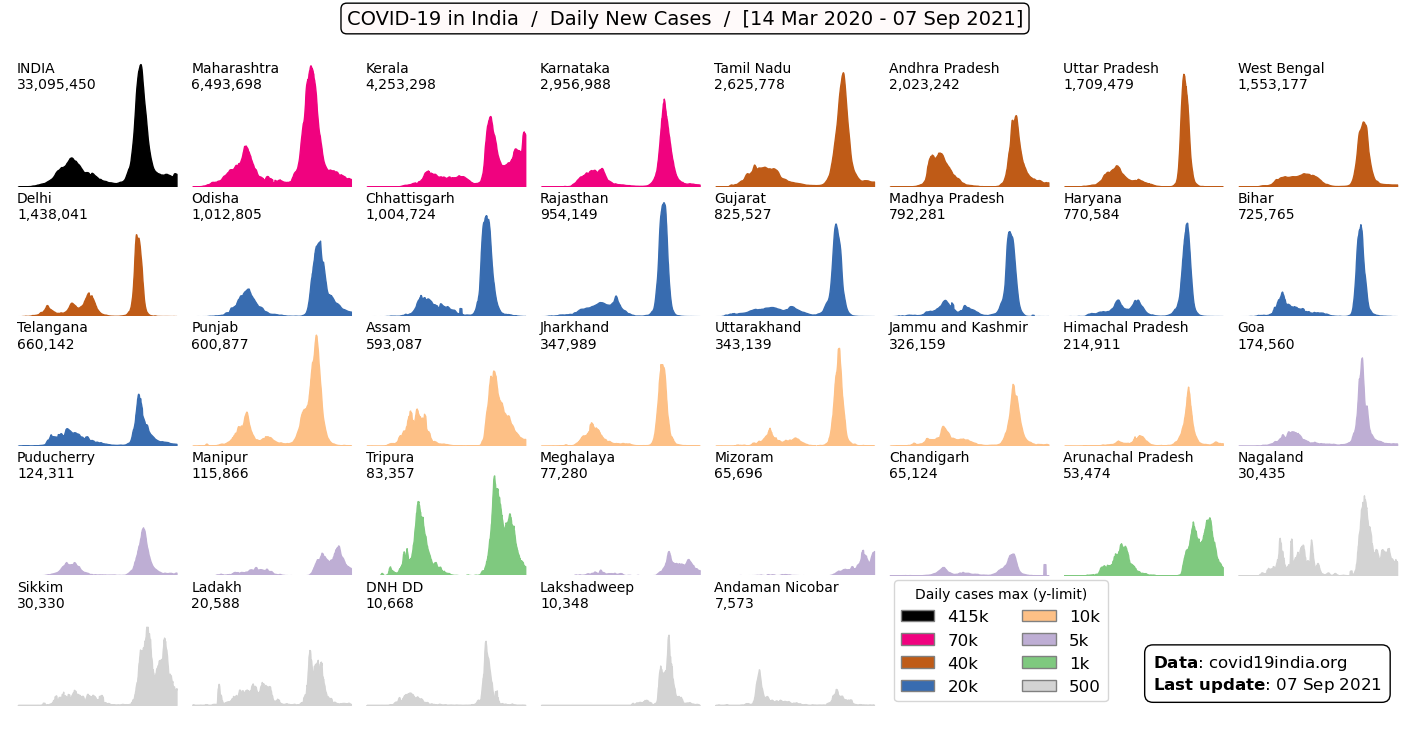

In [16]:
# Plot
plotAllStatesTimeSeries(df_conf_dly, df_state_summary, state2conf, showy=False)

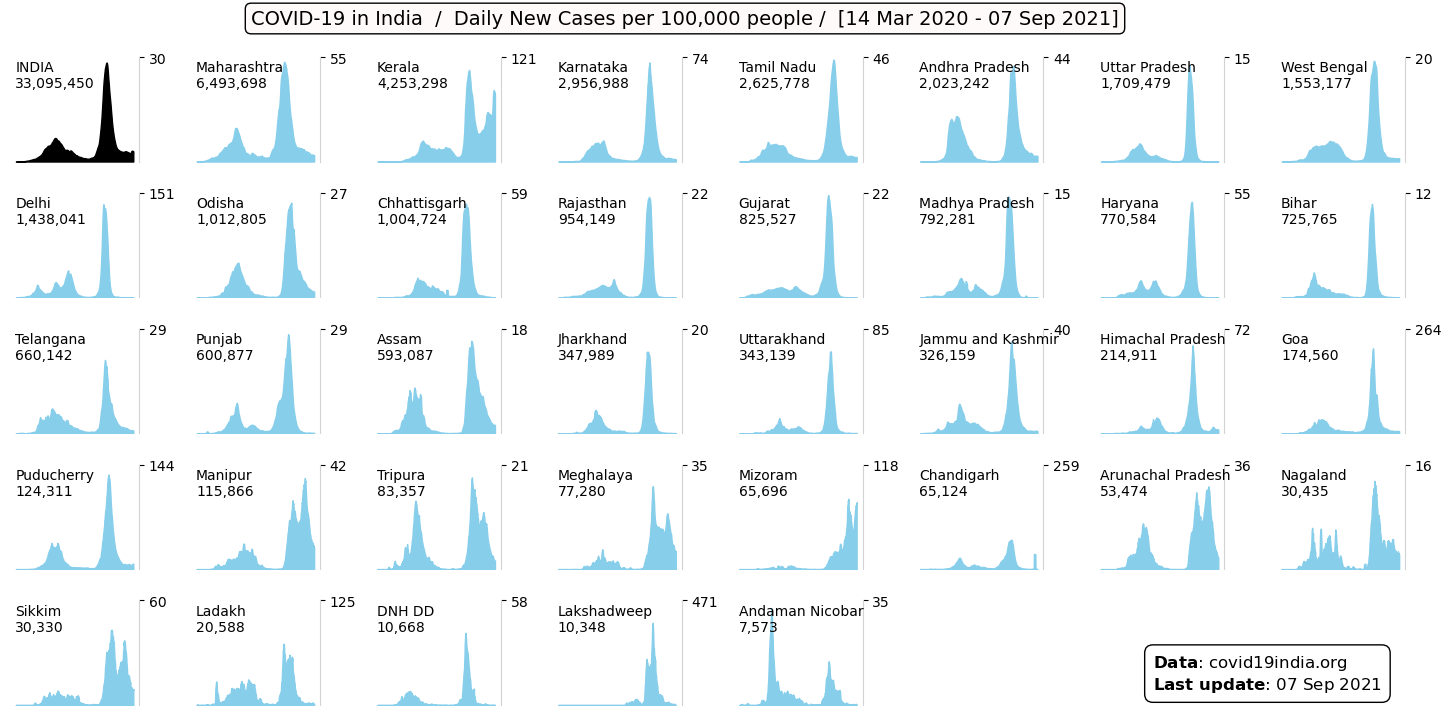

In [17]:
# Plot
plotAllStatesTimeSeries(df_conf_dly, df_state_summary, state2conf, perCapita=True)

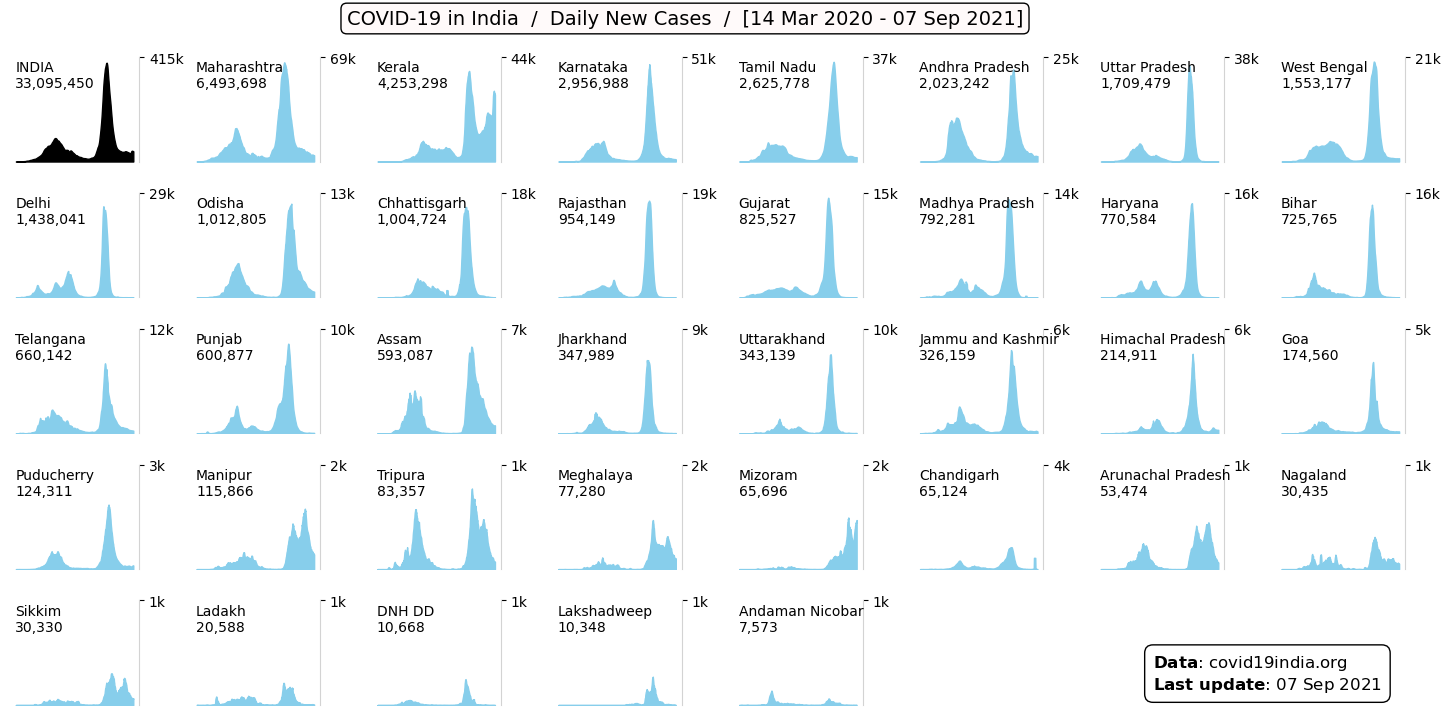

In [18]:
# Plot
plotAllStatesTimeSeries(df_conf_dly, df_state_summary, state2conf, showy=True)

In [19]:
import pdb
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
def plotAllStatesTimeSeriesDeaths(df, df_summary, state2conf, ft=12, showy=False, perCapita=False, saveFig=True):
    # ++++++ 
    # This block sets limits and colors that are hardwired at the moment
    thresh       = [25., 50., 100., 200., 500., 700., 1500.,]
    threshcols   = ['lightgrey','#7fc97f','#beaed4','#fdc086','#386cb0','#bf5b17','#f0027f'] 
    threshlabels = []
    for yy in thresh:
        if yy>=10000.:
            threshlabels.append( '{:,.0f}'.format(int(yy/1000.)) + 'k' )
        else:
            threshlabels.append( str(int(yy)) )
    # ++++++
    
    fig = plt.figure(figsize=(18,8))
    nr = 5; nc = 8; kk = 1
    for st in state2conf:
        ax = plt.subplot(nr, nc, kk)
        maxval = df[st].max()
        
        multFactor = 1.0
        nameExt = ''
        if perCapita:
            state_population = df_summary[ df_summary['State_code']==st ]['Population'].iloc[0]   
            multFactor = 100000./state_population # calculating cases per 100k people
            maxval = maxval * multFactor
            nameExt = 'per 100,000 people'
        
        if perCapita:
            showy=True
        
        # Setting based on whether y-range is show on the plot or in legend
        if showy:
            if perCapita:
                yulim = maxval
                ytickvals = [yulim]
                yticklabs = [str(int(maxval))]
            else:
                yulim = int(math.ceil(maxval/1000.0)) * 1000
                ytickvals = [yulim]
                #yticklabs = [yulim]
                yticklabs = ['{:,.0f}'.format(int(yulim/1000.)) + 'k']
            col = 'skyblue'
            yOnRight = True
            wspace = 0.4
            hspace = 0.3
            alpha  = 1
        else:
            if maxval<=thresh[0]: col=threshcols[0]; yulim = thresh[0]
            if (maxval>thresh[0]) and (maxval<=thresh[1]): col=threshcols[1]; yulim = thresh[1]
            if (maxval>thresh[1]) and (maxval<=thresh[2]): col=threshcols[2]; yulim = thresh[2]
            if (maxval>thresh[2]) and (maxval<=thresh[3]): col=threshcols[3]; yulim = thresh[3]
            if (maxval>thresh[3]) and (maxval<=thresh[4]): col=threshcols[4]; yulim = thresh[4]
            if (maxval>thresh[4]) and (maxval<=thresh[5]): col=threshcols[5]; yulim = thresh[5]
            if (maxval>thresh[5]): col=threshcols[6]; yulim = thresh[6]
            ytickvals = []
            yticklabs = []
            yOnRight = False
            wspace = 0
            hspace = 0
            alpha  = 1

        if st=='TT':
            col='k'
            if perCapita:
                yulim = maxval
            else:
                yulim = int(math.ceil(maxval/1000.0)) * 1000 #300000.
            
        # Line plot
        #ax = sns.lineplot(x="Date", y=st, data=df, color='w', lw=1, alpha=0)
        #l1 = ax.lines[0]
        #x1 = l1.get_xydata()[:,0]
        #y1 = l1.get_xydata()[:,1]
        #ax.fill_between(x1,y1, color=col, alpha=alpha)
        
        ax.fill_between(df['Date'], df[st]*multFactor, color=col, alpha=alpha)
        ax.set_xticks([]) 
        ax.set_xticklabels([])
            
        ax.set_ylim(0, yulim)
        ax.set_yticks(ytickvals)
        #ax.tick_params(axis="y",direction="in", pad=-22)
        ax.set_yticklabels(yticklabs)
        if st=='TT': yulim_tt = yulim     # save separately to add to the legend
        if showy: ax.yaxis.tick_right()

        ax.set_title(state2code[st]+'\n%s' % f'{state2conf[st]:,}', fontsize=10,\
                     y=0.95, x=0.04, ha='left', pad=-18) #, backgroundcolor='lightgrey', color='black')
        ax.set_xlabel('')
        ax.set_ylabel('')
        plt.setp(ax.spines.values(), color='lightgrey')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(yOnRight)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        kk += 1
        
    # Legend
    if not showy:
        from matplotlib.patches import Patch
        legend_elements = [ Patch(facecolor=col, edgecolor='grey', label=threshlabels[cc]) for cc, col in enumerate(threshcols) ]
        legend_elements = legend_elements + [Patch(facecolor='k', edgecolor='grey', label='{:,.0f}'.format(int(yulim_tt/1000.)) + 'k')]
        plt.gcf().legend(handles=legend_elements[::-1], ncol=2, fontsize=ft, title='Daily cases max (y-limit)',\
                  bbox_to_anchor=(0.62,0.225), fancybox=True) #, bbox_transform=plt.gcf().transFigure

    # Super title
    # Get the data start and end dates
    sdate = df_conf_dly['Date'].iloc[0]
    sdate = '%s %s %d' % (sdate.split('-')[0], sdate.split('-')[1], int(sdate.split('-')[2])+2000)
    edate = df_conf_dly['Date'].iloc[-1]
    edate = '%s %s %d' % (edate.split('-')[0], edate.split('-')[1], int(edate.split('-')[2])+2000)
    plt.suptitle('COVID-19 in India  /  Daily Deaths %s /  [%s - %s]' % (nameExt, sdate, edate), fontsize=ft+2,\
                 bbox=dict(facecolor='snow', edgecolor='black', boxstyle='round,pad=0.3'))#backgroundcolor='lightgrey', color='k')
    plt.subplots_adjust(top=0.92)

    # Data source text
    dateNow = str( datetime.datetime.today().strftime ('%d %b %Y') )
    otherText = r'$\bf{Data}$: covid19india.org'+'\n'+r'$\bf{Last~update}$: %s' % dateNow
    ann = plt.figtext(0.76, 0.13, otherText, fontsize=ft,\
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()
    
    # Save png
    if saveFig:
        if perCapita:
            nameExt = '_perCapita'
        elif showy:
            nameExt = '_showy'
        else:
            nameExt = ''
        fig.savefig('plots/daily_deaths%s.png' % nameExt, dpi=360, bbox_inches="tight")

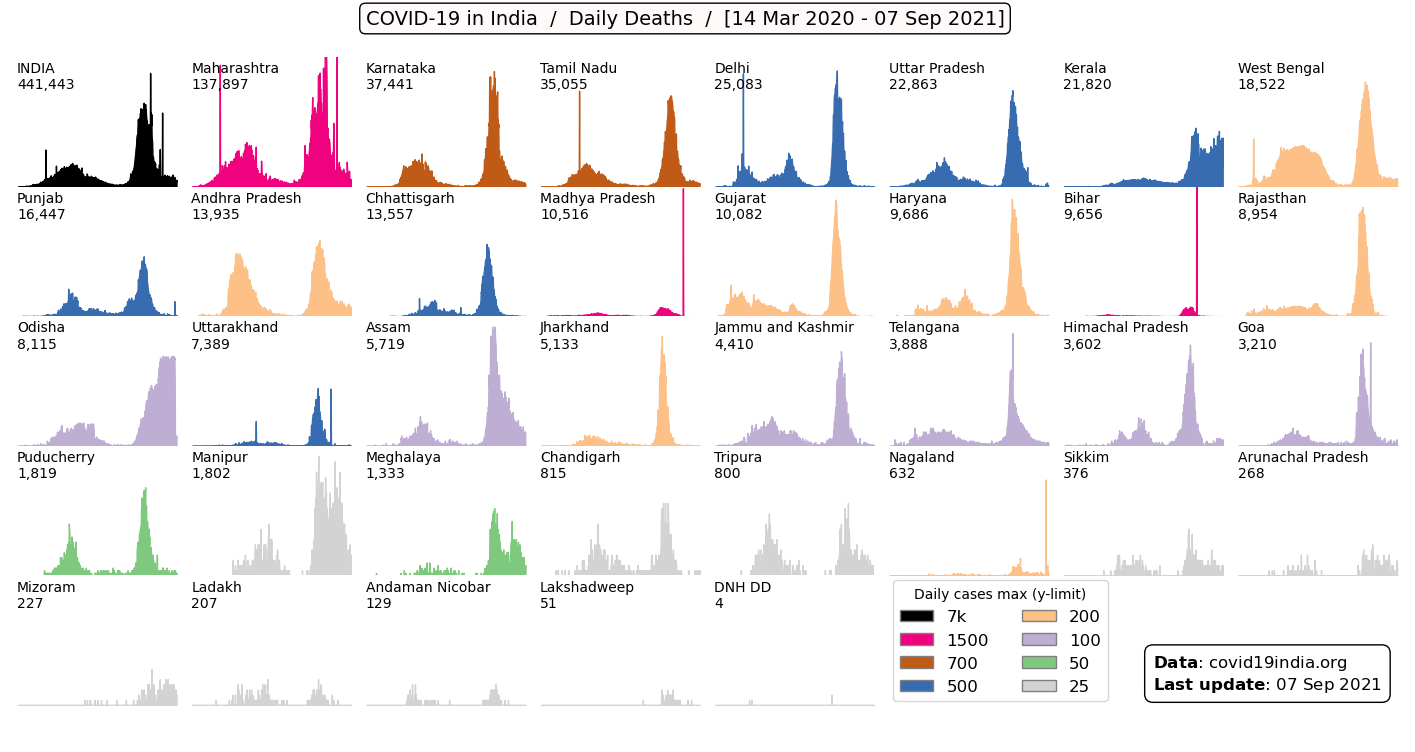

In [20]:
# Plot
plotAllStatesTimeSeriesDeaths(df_deaths_dly, df_state_summary, state2death, showy=False, saveFig=True)

### Daily testing vs. cases

In [21]:
# Tests per state data
df_state_testing = pd.read_csv(url_state_tested_daily)
df_state_testing = df_state_testing[ ['Updated On', 'State', 'Total Tested'] ]
#df_state_testing.head()

# Get the number for the last day in the dataset
df_state_testing_lastday = df_state_testing[ (df_state_testing['Updated On']==edate_monnum) ] 
#df_state_testing_lastday.head()

# Create a new dataframe with require information
df_state_summary_new = df_state_summary[ ['State_code','State','Confirmed'] ]
#df_state_summary_new.head()

# Merge testing data with state case summary data
df_test_conf = pd.merge(df_state_testing_lastday, df_state_summary_new, on='State', how='outer')
df_test_conf.head()

/Users/akarma/Applications/anaconda/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,4,16,30,42,43,44,46,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Updated On,State,Total Tested,State_code,Confirmed
0,07/09/2021,Andaman and Nicobar Islands,NaN,AN,7573
1,07/09/2021,Andhra Pradesh,27037651.0,AP,2023242
2,07/09/2021,Arunachal Pradesh,1080325.0,AR,53474
3,07/09/2021,Assam,22218172.0,AS,593087
4,07/09/2021,Bihar,42858554.0,BR,725765


### Figure 2:<a id=fig2></a><br><br>Number of daily cases per state plotted again the number tests done for TODAY

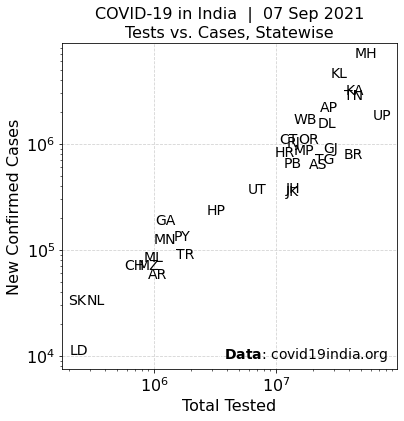

In [22]:
%matplotlib inline

ft = 16
matplotlib.rcParams.update({'font.size':ft})
showText=True

if showText:
    mcolor = 'w'; alpha=0
else:
    mcolor = 'darkred'; alpha=0.6

fig = plt.figure(figsize=(6, 6))
ax  = plt.subplot(111)
splot = sns.regplot(x='Total Tested', y='Confirmed', data=df_test_conf, fit_reg=False,\
                    marker='o', color=mcolor, scatter_kws={'alpha':alpha, 's':100})
splot = splot.set(xscale="log", yscale="log")

if showText:
    for line in range(0, df_test_conf.shape[0]):
        if np.isfinite(df_test_conf['Total Tested'][line]):
            ax.text(df_test_conf['Total Tested'][line], df_test_conf['Confirmed'][line], df_test_conf['State_code'][line],\
                    horizontalalignment='center', size='small', color='black', fontsize=ft-2) #, weight='semibold'
        
plt.title('COVID-19 in India  |  %s\nTests vs. Cases, Statewise' % edate, fontsize=ft)
plt.xlabel('Total Tested', fontsize=ft)
plt.ylabel('New Confirmed Cases', fontsize=ft)
plt.grid(ls='--', color='lightgrey')

otherText = r'$\bf{Data}$: covid19india.org' #+'\n'+r'$\bf{Graphic:}$ @kar_amb'
ann = plt.figtext(0.5, 0.15, otherText, fontsize=ft-2,\
                  bbox=dict(facecolor='none', edgecolor='white')) #, boxstyle='none,pad=0.5'))

fig.savefig('plots/daily_tested_vs_confirmed.png', dpi=360, bbox_inches="tight")

#ax.set_xlim(1e6, 1e8)
#ax.set_ylim(1e5, 1e7)

### Case time series data

In [23]:
## Read case time series data from the beginning of the pandemic
#df = pd.read_csv(url_case_time_series)
#
#dates = [rr for rr, row in enumerate(df['Date_YMD']) if row.split('-')[-1]=='01']
#datenames = df['Date'][dates]
#datenames = ['%s %s\n%s' % (dt.split(' ')[1][:3], dt.split(' ')[0], dt.split(' ')[2]) for dt in datenames]
#
#df.head()